In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [2]:
sns.set(style='darkgrid',font_scale=1.3)
plt.rcParams['font.family']='SimHei'
plt.rcParams['axes.unicode_minus']=False

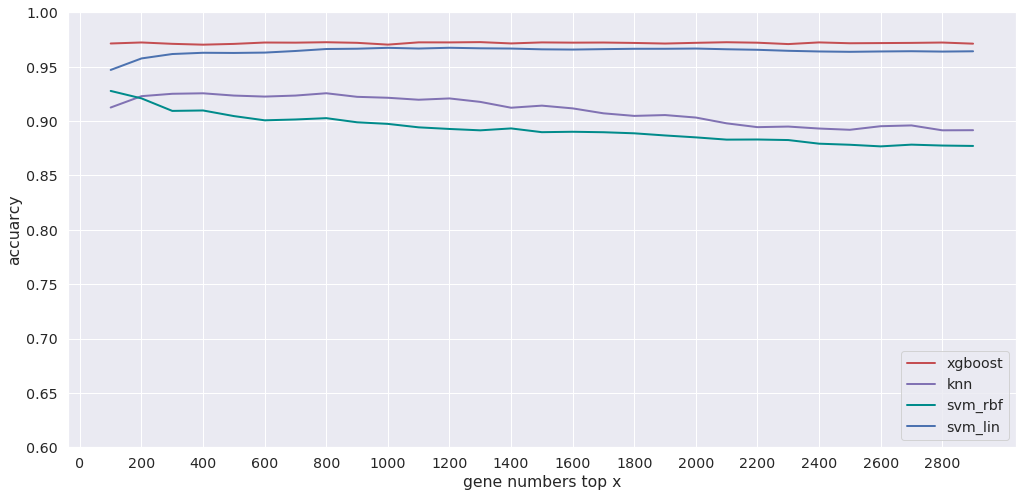

In [157]:
#TCGA_gene
data=pd.read_csv("./TCGA_dataset/gene_sel_acc_val.csv",index_col=0)
data.shape

x=np.arange(100,3000,100)
plt.figure(figsize=(17,8))
plt.plot(x,data.loc[:,'xgboost'].values,color='r',linestyle='-',label='down',linewidth=2)
plt.plot(x,data.loc[:,'knn'].values,color='m',linestyle='-',label='down',linewidth=2)
plt.plot(x,data.loc[:,'svm_rbf'].values,color='darkcyan',linestyle='-',label='down',linewidth=2)
plt.plot(x,data.loc[:,'svm_lin'].values,color='b',linestyle='-',label='down',linewidth=2)
plt.legend(labels=['xgboost','knn','svm_rbf','svm_lin'],loc='lower right')
plt.xlabel("gene numbers top x")
plt.ylabel("accuarcy")
plt.yticks(np.arange(0.6,1.05,0.05))
plt.xticks(np.arange(0,3000,200))
plt.savefig("./TCGA_dataset/plot/TCGA_feature_sel.jpg",dpi=175)

plt.show()

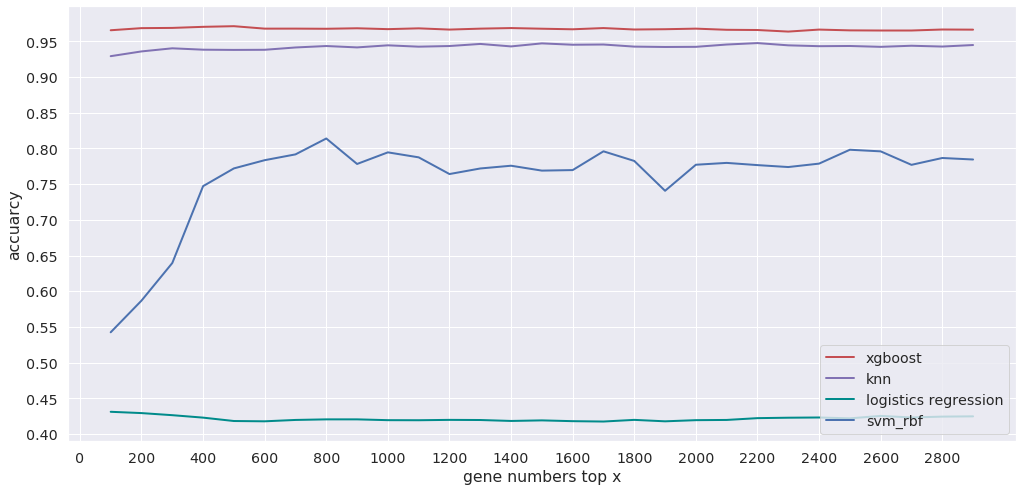

In [24]:
#GEO_gene
data=pd.read_csv("./GEO_dataset/gene_sel_acc_val.csv",index_col=0)
data.shape

x=np.arange(100,3000,100)
plt.figure(figsize=(17,8))
plt.plot(x,data.loc[:,'xgboost'].values,color='r',linestyle='-',label='down',linewidth=2)
plt.plot(x,data.loc[:,'knn'].values,color='m',linestyle='-',label='down',linewidth=2)
plt.plot(x,data.loc[:,'svm_rbf'].values,color='darkcyan',linestyle='-',label='down',linewidth=2)
plt.plot(x,data.loc[:,'logistics regression'].values,color='b',linestyle='-',label='down',linewidth=2)
plt.legend(labels=['xgboost','knn','logistics regression','svm_rbf'],loc='lower right')
plt.xlabel("gene numbers top x")
plt.ylabel("accuarcy")
plt.yticks(np.arange(0.4,1,0.05))
plt.xticks(np.arange(0,3000,200))
plt.savefig("./GEO_dataset/GEO_feature_sel.jpg",dpi=175)
plt.show()


In [130]:
T_data=pd.read_csv("./TCGA_label.csv",header=None)
T_data=T_data.loc[:,0].values
T=Counter(T_data)
T

Counter({1.0: 79,
         2.0: 426,
         3.0: 1193,
         4.0: 309,
         14.0: 462,
         5.0: 171,
         6.0: 173,
         7.0: 546,
         8.0: 404,
         9.0: 134,
         10.0: 567,
         11.0: 121,
         12.0: 619,
         13.0: 80,
         0.0: 424})

In [131]:
name=['liver','adrenal gland','bladder','breast','cervix',
 'esophagus','pancreas','prostate','stomach','testis',
 'thyroid','thymus','uterus','eye','colorectal']
num=[]
for i in range(15):
    num.append(T[i])
num

[424, 79, 426, 1193, 309, 171, 173, 546, 404, 134, 567, 121, 619, 80, 462]

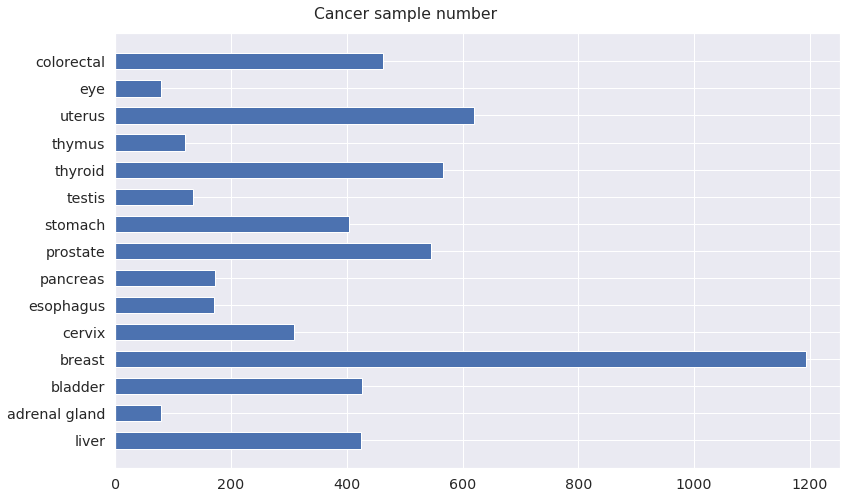

In [133]:
plt.figure(figsize=(13,8))
plt.barh(name,num,0.6)
plt.title("Cancer sample number",x=0.4,y=1.02)
plt.savefig("./TCGA_dataset/plot/TCGA_cancer_number.jpg",dpi=175)

In [134]:
G_data=pd.read_csv("./GEO_infor.csv",index_col=0)
site=G_data.loc[:,'primary_site'].values

In [135]:
from collections import Counter
s=Counter(site)

In [136]:
s

Counter({'skin': 428,
         'kindey': 165,
         'colorectum': 898,
         'liver': 39,
         'thyroid': 91,
         'breast': 1186,
         'lung': 120,
         'hypopharynx': 6,
         'oropharynx': 2,
         'bone': 49,
         'tongue': 16,
         'larynx': 1,
         'eye': 41,
         'stomach': 1,
         'pancreas': 15,
         'oral cavity': 5,
         'mandible': 1,
         'FOM': 4,
         'prostate': 33})

In [137]:
name=[]
num=[]
for i in s.keys():
    name.append(i)
    num.append(s[i])

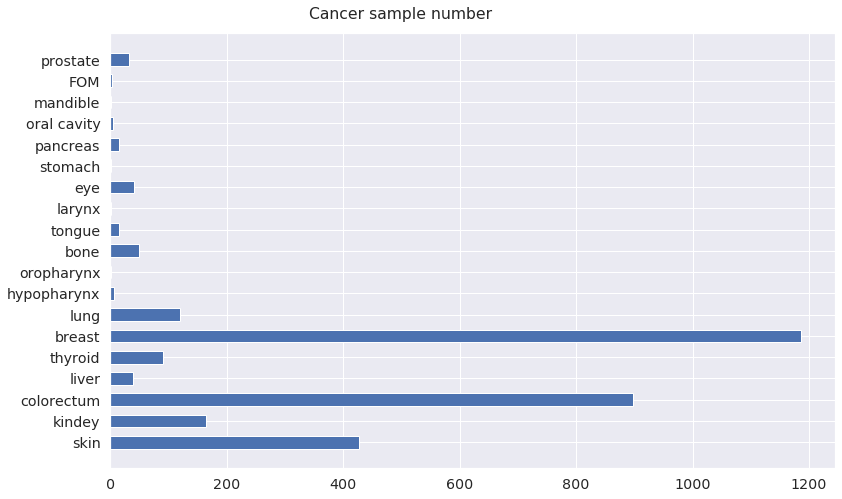

In [138]:
plt.figure(figsize=(13,8))
plt.barh(name,num,0.6)
plt.title("Cancer sample number",x=0.4,y=1.02)
plt.savefig("./GEO_dataset/plot/GEO_cancer_number.jpg",dpi=125)

In [141]:
T=pd.read_csv("./TCGA_dataset/gene_sel_acc_val.csv",index_col=0)
T

,xgboost,knn,svm_lin,svm_rbf
0,0.903296,0.766316,0.872872,0.861076
1,0.927467,0.811725,0.913315,0.883178
2,0.931149,0.823084,0.928122,0.883738
3,0.932843,0.817797,0.933052,0.880162
4,0.937120,0.814435,0.935139,0.873693
5,0.936576,0.814257,0.937335,0.873815
6,0.937237,0.820011,0.939362,0.874126
7,0.941510,0.810036,0.939527,0.874525
8,0.942549,0.815675,0.941280,0.873421
9,0.945837,0.825280,0.942488,0.873482


In [142]:
T=pd.read_csv("./GEO_dataset/gene_sel_acc_val.csv",index_col=0)
T

,xgboost,knn,logistics regression,svm_rbf
0,0.965373,0.929090,0.542500,0.431187
1,0.968330,0.935740,0.586834,0.429373
2,0.968650,0.940107,0.639474,0.426441
3,0.970159,0.938154,0.747107,0.423013
4,0.971064,0.937856,0.771945,0.418272
5,0.967631,0.938022,0.783465,0.417863
6,0.967652,0.941266,0.791584,0.419772
7,0.967441,0.943292,0.813823,0.420582
8,0.968144,0.941355,0.778165,0.420587
9,0.966921,0.944274,0.794419,0.419464


In [158]:
T=pd.read_csv("./TCGA_dataset/TCGA_gene_importance.csv")
T=T.loc[:,'gene_name'].values[:800]
with open("./TCGA_dataset/TCGA_gene_sel_name.txt","w") as f:
    for i in T:
        f.write(i)
        f.write(",")
f.close()

In [151]:
T=pd.read_csv("./GEO_dataset/GEO_gene_importance.csv")
T=T.loc[:,'gene_name'].values[:500]

with open("./GEO_dataset/GEO_gene_sel_name.txt","w") as f:
    for i in T:
        f.write(i)
        f.write(",")
f.close()

In [214]:
#TCGA_gene
data=pd.read_csv("./TCGA_dataset/gene_sel_data/train.csv",header=None)
data=data.values
print(data.shape)
gene_name=pd.read_csv("./TCGA_dataset/TCGA_gene_importance.csv")
gene_name=gene_name.loc[:,'gene_name'].values[:60]
print(len(gene_name))
label=pd.read_csv("./TCGA_dataset/train_TCGA_label.csv",header=None)
label=label.loc[:,0].values
label

(4560, 800)
60


array([1., 1., 1., ..., 0., 0., 0.])

In [215]:
name=['liver','adrenal gland','bladder','breast','cervix',
 'esophagus','pancreas','prostate','stomach','testis',
 'thyroid','thymus','uterus','eye','colorectal']

In [220]:
num_l=[0]*15
gene_expre=np.zeros((15,60))
for i in range(data.shape[0]):
    num_l[int(label[i])]+=1
    gene_expre[int(label[i])]+=data[i,:60]
for i in range(len(num_l)):
    gene_expre[i]=gene_expre[i]/num_l[i]

In [221]:
for i in range(gene_expre.shape[0]):
    for j in range(gene_expre.shape[1]):
        gene_expre[i,j]=1-math.exp(-gene_expre[i,j])

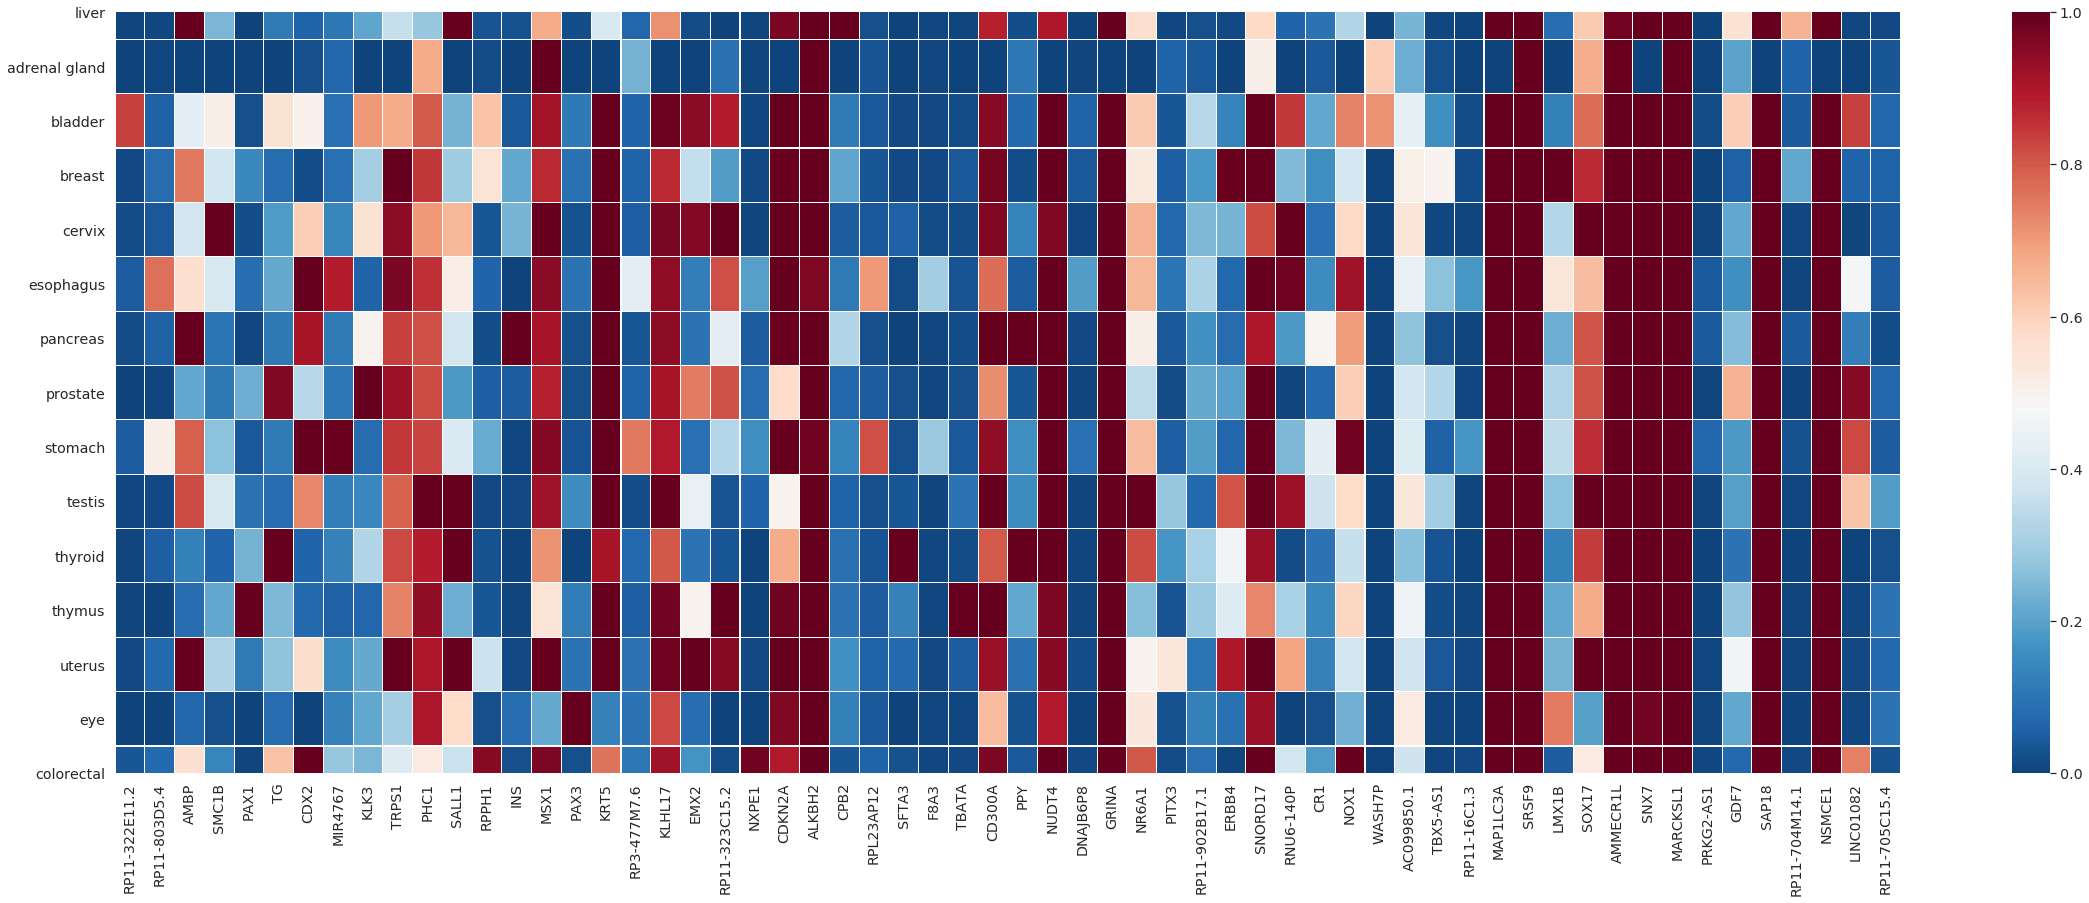

In [250]:
f,ax=plt.subplots(figsize=(40,14))
sns.heatmap(gene_expre,cmap='RdBu_r',ax=ax,linewidths=0.08,
            xticklabels=gene_name,yticklabels=name,center=0.48)
plt.savefig("./TCGA_dataset/plot/TCGA_gene_express.jpg",dpi=175)
plt.show()

In [3]:
#GEO_gene
data=pd.read_csv("./GEO_dataset/gene_sel_data/train.csv",header=None)
data=data.values
print(data.shape)
gene_name=pd.read_csv("./GEO_dataset/GEO_gene_importance.csv")
gene_name=gene_name.loc[:,'gene_name'].values[:60]
print(len(gene_name))
label=pd.read_csv("./GEO_dataset/train_GEO_label.csv",header=None)
label=label.loc[:,0].values
label

(2476, 500)
60


array([0, 0, 0, ..., 5, 5, 5])

In [4]:
name=['skin','kindey','colorectum','liver','thyroid','breast','lung',
      'other1','tongue','eye','other2']

In [37]:
num_l=[0]*11
gene_expre=np.zeros((11,60))
for i in range(data.shape[0]):
    num_l[int(label[i])]+=1
    gene_expre[int(label[i])]+=data[i,:60]
for i in range(len(num_l)):
    gene_expre[i]=gene_expre[i]/num_l[i]

In [38]:
for i in range(gene_expre.shape[0]):
    for j in range(gene_expre.shape[1]):
        if gene_expre[i,j]>600:
            gene_expre[i,j]=600+(gene_expre[i,j]/300)
#        else:
#            gene_expre[i,j]=1/(1+math.exp(-abs(gene_expre[i,j])))

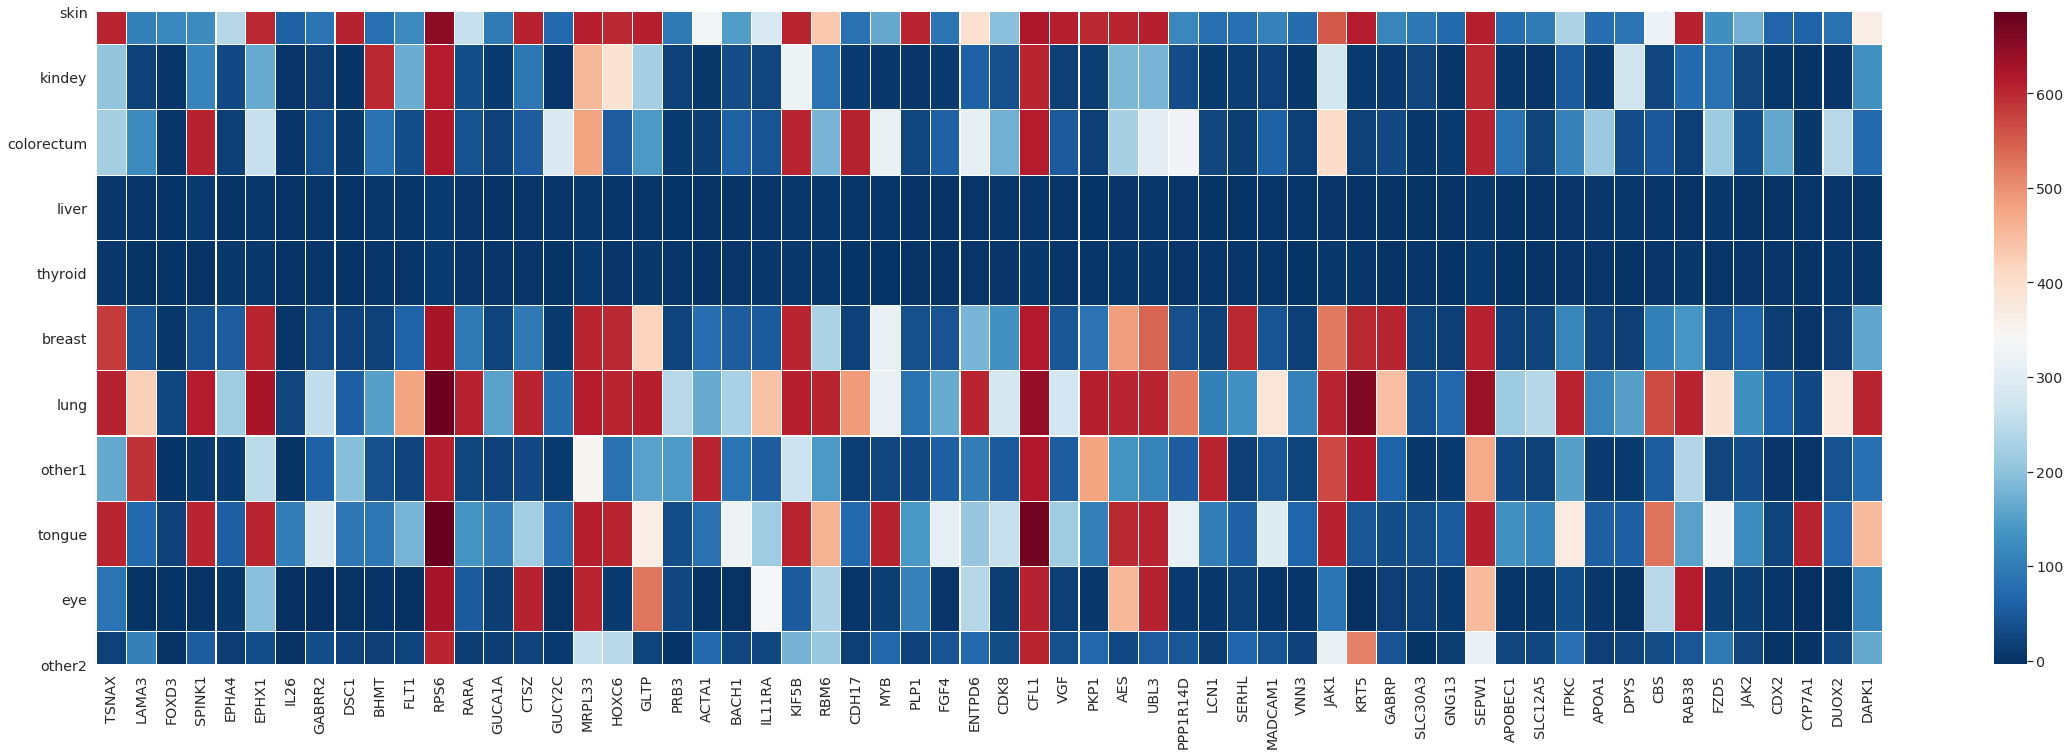

In [40]:
f,ax=plt.subplots(figsize=(40,12))
sns.heatmap(gene_expre,cmap='RdBu_r',ax=ax,linewidths=0.08,
            xticklabels=gene_name,yticklabels=name)
plt.savefig("./GEO_dataset/plot/GEO_gene_express.jpg",dpi=175)
plt.show()

In [264]:
Counter(label)

Counter({0: 342,
         1: 132,
         2: 718,
         3: 31,
         4: 72,
         5: 948,
         6: 96,
         7: 24,
         8: 39,
         9: 32,
         10: 42})